In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist # db with images of handwritten digits [28x28] pixels

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
%matplotlib inline

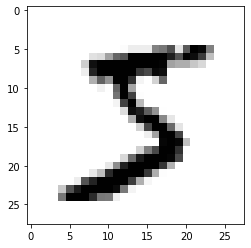

In [3]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

# print(X_train[0])

In [4]:
# normalize values
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
# model/architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 2s 822us/step - loss: 0.2527 - accuracy: 0.9250
Epoch 2/9
1875/1875 [==============================] - 2s 830us/step - loss: 0.1032 - accuracy: 0.9682
Epoch 3/9
1875/1875 [==============================] - 2s 862us/step - loss: 0.0697 - accuracy: 0.9778
Epoch 4/9
1875/1875 [==============================] - 2s 838us/step - loss: 0.0516 - accuracy: 0.9834
Epoch 5/9
1875/1875 [==============================] - 2s 846us/step - loss: 0.0393 - accuracy: 0.9873
Epoch 6/9
1875/1875 [==============================] - 2s 870us/step - loss: 0.0327 - accuracy: 0.9892
Epoch 7/9
1875/1875 [==============================] - 2s 904us/step - loss: 0.0244 - accuracy: 0.9921
Epoch 8/9
1875/1875 [==============================] - 2s 837us/step - loss: 0.0216 - accuracy: 0.9926
Epoch 9/9
1875/1875 [==============================] - 2s 877us/step - loss: 0.0163 - accuracy: 0.9943


In [6]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 507us/step - loss: 0.1096 - accuracy: 0.9741
0.1096160039305687 0.9740999937057495


In [7]:
predictions = model.predict(X_test)
print(predictions)

[[3.89701140e-15 3.13270330e-12 5.22433332e-08 ... 9.99999523e-01
  1.61127556e-10 6.84862278e-10]
 [6.58258751e-19 1.38637217e-08 1.00000000e+00 ... 1.92968293e-16
  5.72909842e-18 6.09984191e-28]
 [8.41207665e-14 9.99998689e-01 2.14355825e-11 ... 5.74393475e-08
  5.54857365e-07 2.02934761e-12]
 ...
 [7.92126683e-17 5.06791986e-09 1.15316163e-13 ... 7.47119522e-09
  3.80285101e-08 1.15010698e-06]
 [3.84843242e-12 1.78268456e-10 6.80278545e-15 ... 5.59733737e-14
  2.21832379e-05 1.22971195e-15]
 [2.22904936e-14 1.49311596e-12 3.15057794e-13 ... 1.11394054e-20
  6.24297109e-13 5.58925526e-19]]


In [8]:
#save model
model.save('mnist-deep-classifier.h5')

In [9]:
# load model
same_model = tf.keras.models.load_model('mnist-deep-classifier.h5')

In [10]:
import numpy as np

print(np.argmax(predictions[0]))

7


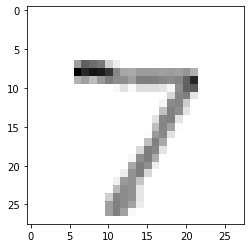

In [11]:
plt.imshow(X_test[0], cmap = plt.cm.binary)

In [12]:
predictions2 = same_model.predict(X_test)
print(np.argmax(predictions2[0]))

7
